<a href="https://colab.research.google.com/github/BillyWong2755/BillyWong2755-DataScience-GenAI-Submissions/blob/main/Assignment_1/Class_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

Upload this file

Sure, I can help you with that! I will load the /content/in_class_test(in).csv file into a pandas DataFrame and display the first 5 rows.

In [ ]:
import pandas as pd

df = pd.read_csv('/content/in_class_test(in).csv')
display(df.head())

,Country,Year,Gender,Life Expectancy,Infant Mortality Rate,Low CI Value Infant Mortality Rate,High CI Value Infant Mortality Rate,Under 5 Mortality Rate,Low CI Value Under 5 Mortality Rate,High CI Value Under 5 Mortality Rate,...,Cereal Consumption Rye,Cereal Consumption Barley,Cereal Consumption Sorghum,Cereal Consumption Maize,Cereal Consumption Wheat,Cereal Consumption Rice,Diet Calories Animal Protein,Diet Calories Plant Protein,Diet Calories Fat,Diet Calories Carbohydrates
0,Afghanistan,1990,Both sexes,50.331,120.4,111.2,130.9,177.7,162.5,194.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
1,Afghanistan,1990,Female,51.442,114.2,105.1,124.7,173.1,158.0,189.7,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
2,Afghanistan,1990,Male,49.281,126.2,116.4,137.5,182.0,166.6,199.3,...,NaN,103.0,NaN,201.0,1195.0,174.0,67.80,197.08,435.60,1613.52
3,Afghanistan,1991,Both sexes,50.999,116.8,108.2,126.2,171.7,157.6,186.9,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28
4,Afghanistan,1991,Female,52.119,110.7,102.1,120.4,167.1,153.0,182.6,...,NaN,94.0,NaN,164.0,1043.0,159.0,64.96,173.68,370.08,1435.28


How many rows and columns are there?

You can find out how many rows and columns there are using the .shape attribute of the DataFrame. Here's the code for that:

In [ ]:
print(df.shape)

(22050, 150)


Give me the info of the data set

To get a concise summary of the DataFrame, including the data types of each column and the number of non-null values, I will use the .info() method. This is very useful for understanding the dataset's structure and identifying potential missing values or incorrect data types.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Columns: 150 entries, Country to Diet Calories Carbohydrates
dtypes: float64(147), int64(1), object(2)
memory usage: 25.2+ MB


In [ ]:
# Now we see that most columns are in type float64. They are numerical, and therefore should be easy to deal with, e.g. min-max scaling.

# Missing Data

Show me how many missing values there are in each column

Sure, I can show you the number of missing values in each column. I will use df.isnull().sum() to get a count of NaN values for every column in the DataFrame.



In [ ]:
missing_values = df.isnull().sum()
display(missing_values[missing_values > 0])

,0
Infant Mortality Rate,7593
Low CI Value Infant Mortality Rate,7593
High CI Value Infant Mortality Rate,7593
Under 5 Mortality Rate,7593
Low CI Value Under 5 Mortality Rate,7593
...,...
Cereal Consumption Rice,9084
Diet Calories Animal Protein,9972
Diet Calories Plant Protein,9972
Diet Calories Fat,9972


Give me a percentage of the missing values in that column.

Certainly! I'll calculate the percentage of missing values for each column and display only those columns that have at least one missing value.

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
display(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

,0
Reproductive Age Women,98.448980
Air Pollution Death Rate Ischaemic Heart Disease,97.564626
Low CI Value Air Pollution Death Rate Stroke,97.564626
High CI Value Air Pollution Death Rate Stroke,97.564626
Low CI Value Air Pollution Death Rate Stroke Age Standarized,97.564626
...,...
Homicide Rate,25.968254
% Population Aged 65+,24.326531
% Population Aged 15-64,24.326531
% Population Aged 0-14,24.326531


In [ ]:
# For Total Population there are 17240 counts in Excel. That means we have
print(f'{22050-17239} missing values; or {(22050-17239)/22050 *100}%')

4811 missing values; or 21.81859410430839%


In [ ]:
# That's correct! But we can see that there are a lot of missing data in these 146 columns. We may need to accept a higher % of missing values. Since it's a large dataset, let's say we want to delete the ones with more than 35% values missing.

Drop all columns that has more than 35% of missing values

Okay, I will drop all columns that have more than 35% missing values from the DataFrame. This will help clean the dataset by removing features with a high proportion of missing information.

In [ ]:
columns_to_drop = missing_percentage[missing_percentage > 35].index
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Dropped {len(columns_to_drop)} columns with more than 35% missing values.")
print(f"New DataFrame shape: {df_cleaned.shape}")

Dropped 126 columns with more than 35% missing values.
New DataFrame shape: (22050, 24)


In [ ]:
# Now we only have 24 columns left. This helps us do the analysis faster because we simply skip the columns that requires us to guess a lot of missing values.

In [ ]:
missing_percentage = (df_cleaned.isnull().sum() / len(df)) * 100
display(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

,0
Infant Mortality Rate,34.435374
Low CI Value Infant Mortality Rate,34.435374
High CI Value Infant Mortality Rate,34.435374
Under 5 Mortality Rate,34.435374
Low CI Value Under 5 Mortality Rate,34.435374
High CI Value Under 5 Mortality Rate,34.435374
Conflict and Terrorism Deaths,30.816327
GNI per Capita,30.589569
Vegetable Consumption,29.750567
GDP per Capita,29.011338


# Data Visualisation

Box whisker plot for life expectancy

Certainly! I'll create a box and whisker plot to visualize the distribution of 'Life Expectancy'. This will help us understand the median, quartiles, and any potential outliers in the life expectancy data.



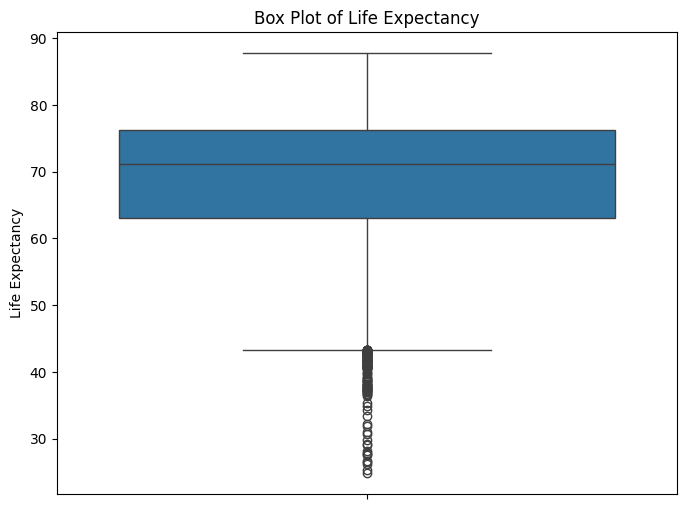

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(y=df_cleaned['Life Expectancy'])
plt.title('Box Plot of Life Expectancy')
plt.ylabel('Life Expectancy')
plt.show()

In [ ]:
# We can see the distibution of life expectancy here. In the dataset, the median, Q1, and Q3 are around 71, 63, 77 years old, respectively.

Draw a bar chart for Life Expectancy across different 'Gender' categories.

Certainly! I'll create a bar chart to visualize the average 'Life Expectancy' across different 'Gender' categories. This will help us understand if there are noticeable differences in life expectancy between genders in the dataset.



/tmp/ipython-input-1109905798.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Gender', y='Life Expectancy', data=life_expectancy_by_gender, palette='viridis')


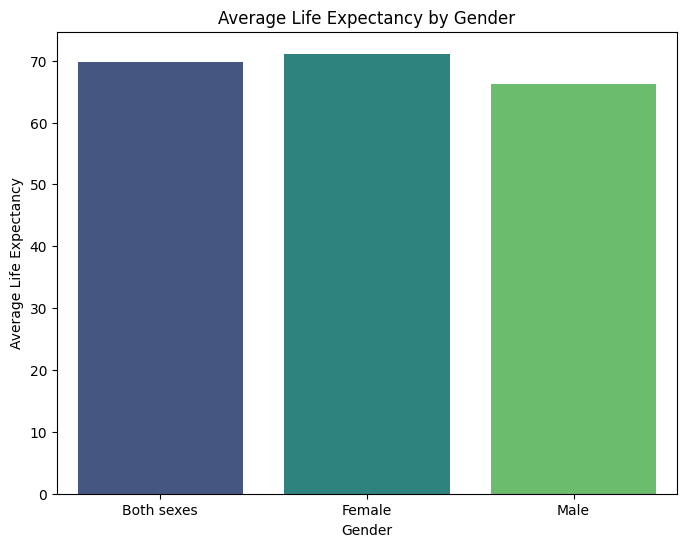

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average life expectancy by gender
life_expectancy_by_gender = df_cleaned.groupby('Gender')['Life Expectancy'].mean().reset_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Life Expectancy', data=life_expectancy_by_gender, palette='viridis')
plt.title('Average Life Expectancy by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Life Expectancy')
plt.show()

Plot top 5 and bottom 5 countries by Life Expectancy

Certainly! I'll create a bar chart showing the average 'Life Expectancy' for the top 5 and bottom 5 countries. This will highlight the countries with the highest and lowest life expectancies in your dataset.

/tmp/ipython-input-4261368846.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='Life Expectancy', data=combined_countries_sorted, palette='viridis')


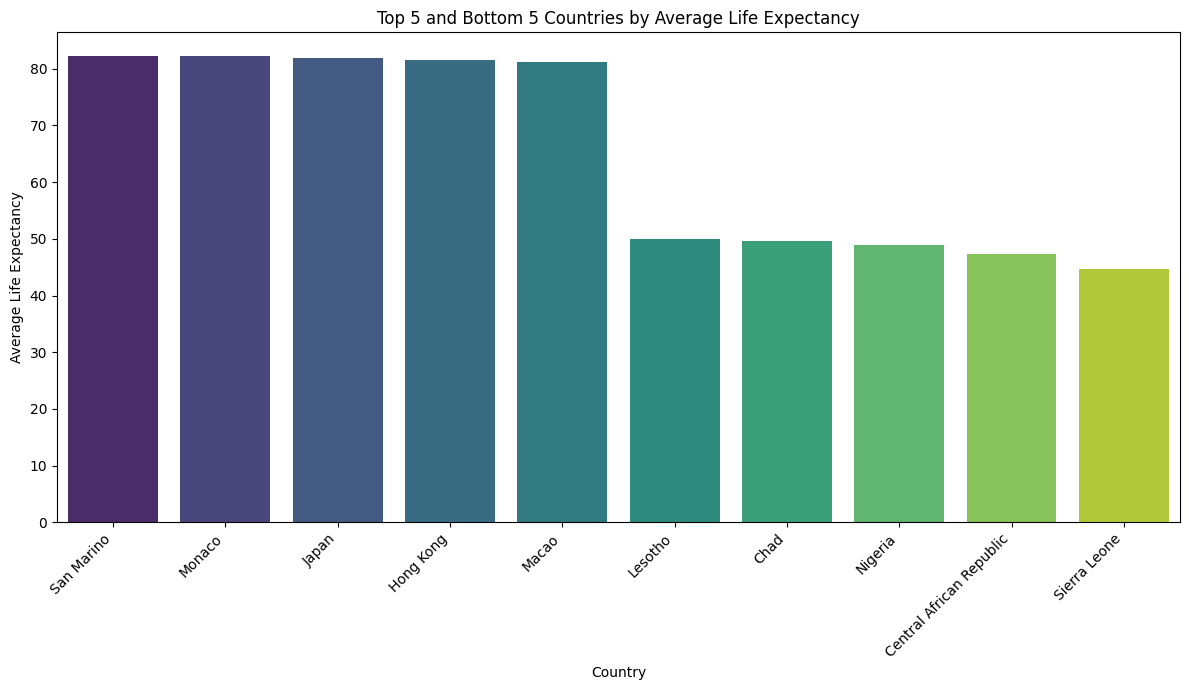

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate average life expectancy by country
life_expectancy_by_country = df_cleaned.groupby('Country')['Life Expectancy'].mean().reset_index()

# Get top 5 countries by life expectancy
top_5_countries = life_expectancy_by_country.nlargest(5, 'Life Expectancy')

# Get bottom 5 countries by life expectancy
bottom_5_countries = life_expectancy_by_country.nsmallest(5, 'Life Expectancy')

# Concatenate top 5 and bottom 5 countries
combined_countries = pd.concat([top_5_countries, bottom_5_countries])

# Sort for better visualization
combined_countries_sorted = combined_countries.sort_values(by='Life Expectancy', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x='Country', y='Life Expectancy', data=combined_countries_sorted, palette='viridis')
plt.title('Top 5 and Bottom 5 Countries by Average Life Expectancy')
plt.xlabel('Country')
plt.ylabel('Average Life Expectancy')
plt.xticks(rotation=45, ha='right') # Rotate labels for better readability
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
# Now we see that female has a longer life. For countries, people in San Marino, Japan, Hong Kong have a longer life. These match my expectation.

Draw two scatter plots of Life Expectancy. One against Homicide Rate and one against Total Population

Certainly! I'll generate two scatter plots for you. One will visualize the relationship between 'Life Expectancy' and 'Homicide Rate', and the other will show 'Life Expectancy' against 'Total Population'. This will help us understand if there are any correlations between these variables.

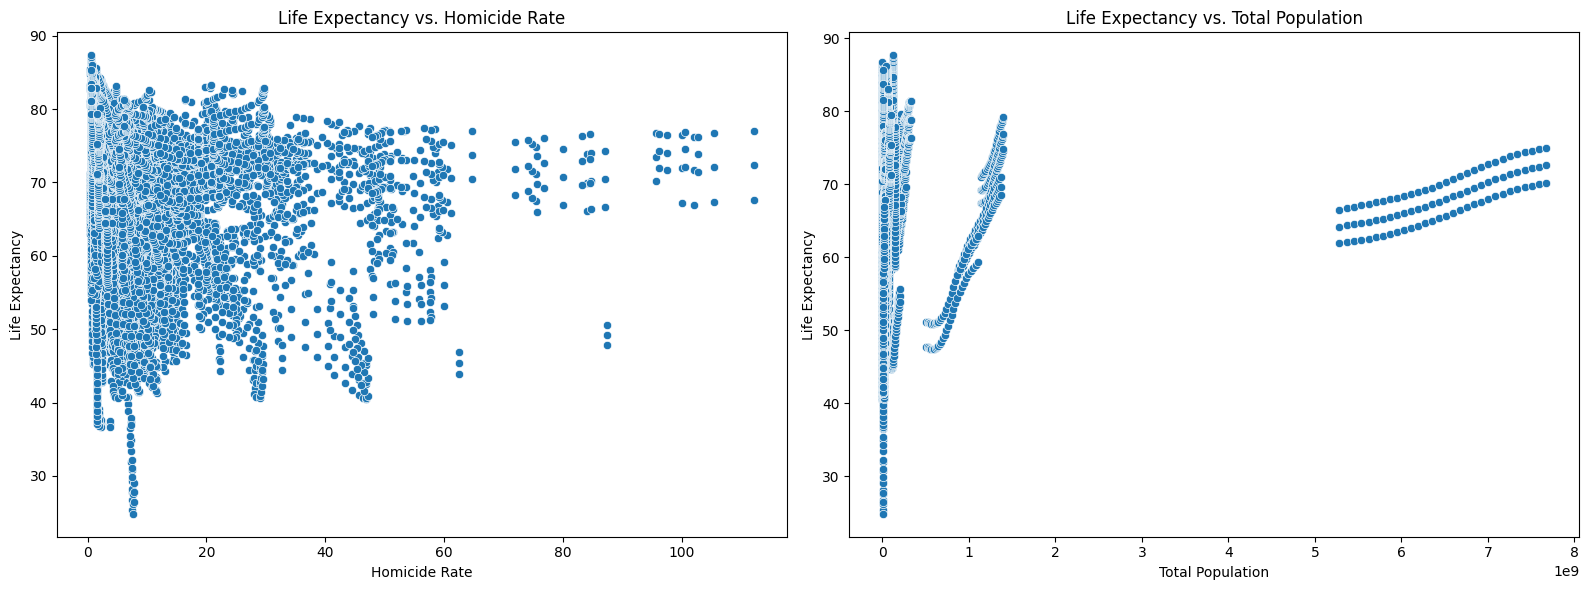

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Define column names
homicide_col = 'Homicide Rate'
population_col = 'Total Population'

# Plot Life Expectancy vs. Homicide Rate
if homicide_col in df_cleaned.columns:
    plot_data_homicide = df_cleaned.dropna(subset=['Life Expectancy', homicide_col])
    if not plot_data_homicide.empty:
        sns.scatterplot(x=homicide_col, y='Life Expectancy', data=plot_data_homicide, ax=axes[0])
        axes[0].set_title(f'Life Expectancy vs. {homicide_col}')
        axes[0].set_xlabel(homicide_col)
        axes[0].set_ylabel('Life Expectancy')
    else:
        axes[0].set_visible(False) # Hide the subplot if no data to plot after dropping NaNs
        print(f"Warning: No data available for plotting '{homicide_col}' after dropping NaN values.")
else:
    axes[0].set_visible(False) # Hide the subplot if column is missing
    print(f"Warning: '{homicide_col}' column not found in the cleaned DataFrame. It might have been dropped due to high missing values.")

# Plot Life Expectancy vs. Total Population
if population_col in df_cleaned.columns:
    plot_data_population = df_cleaned.dropna(subset=['Life Expectancy', population_col])
    if not plot_data_population.empty:
        sns.scatterplot(x=population_col, y='Life Expectancy', data=plot_data_population, ax=axes[1])
        axes[1].set_title(f'Life Expectancy vs. {population_col}')
        axes[1].set_xlabel(population_col)
        axes[1].set_ylabel('Life Expectancy')
    else:
        axes[1].set_visible(False) # Hide the subplot if no data to plot after dropping NaNs
        print(f"Warning: No data available for plotting '{population_col}' after dropping NaN values.")
else:
    axes[1].set_visible(False) # Hide the subplot if column is missing
    print(f"Warning: '{population_col}' column not found in the cleaned DataFrame. It might have been dropped due to high missing values.")

plt.tight_layout()
plt.show()

In [ ]:
# We can do this to all columns to see if there is any interesting finding. I don't have enough time here though.

Draw a pair plot for Life Expectancy, Birth Rate, GDP per Capita

Certainly! I'll generate a pair plot for 'Life Expectancy', 'Birth Rate', and 'GDP per Capita'. Before doing so, I will check if these columns are available in our cleaned dataset. If any of them were dropped during the cleaning process, I will let you know.

Generating pair plot for: Life Expectancy, Birth Rate, GDP per Capita


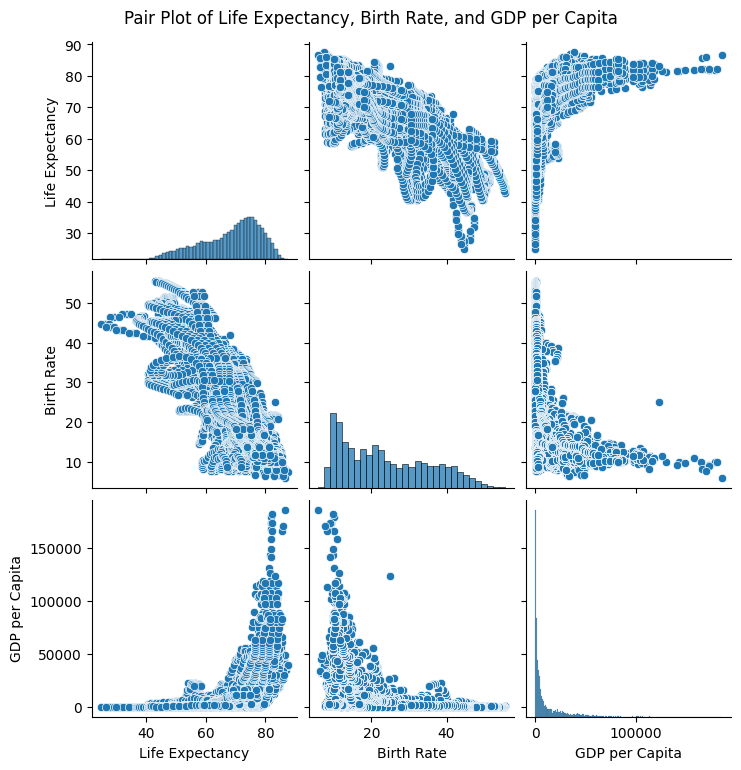

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

columns_for_pairplot = ['Life Expectancy']

# Check for 'Birth Rate'
if 'Birth Rate' in df_cleaned.columns:
    columns_for_pairplot.append('Birth Rate')
else:
    print("Warning: 'Birth Rate' column not found in the cleaned DataFrame. It might have been dropped due to high missing values.")

# Check for 'GDP per Capita'
if 'GDP per Capita' in df_cleaned.columns:
    columns_for_pairplot.append('GDP per Capita')
else:
    print("Warning: 'GDP per Capita' column not found in the cleaned DataFrame. It might have been dropped due to high missing values.")

# Create a subset DataFrame with only the selected columns that exist
df_pairplot = df_cleaned[columns_for_pairplot].dropna()

if len(columns_for_pairplot) > 1 and not df_pairplot.empty:
    print(f"Generating pair plot for: {', '.join(columns_for_pairplot)}")
    sns.pairplot(df_pairplot)
    plt.suptitle('Pair Plot of Life Expectancy, Birth Rate, and GDP per Capita', y=1.02) # Adjust suptitle position
    plt.show()
else:
    print("Cannot generate a meaningful pair plot as not enough valid columns or data were found after cleaning.")

In [ ]:
# Interesting! The higher the birth rate, the lower the life expectancy.

# Data Preparation

In [ ]:
# I don't have time but if I do I would also do one-hot encoding to countries. And fill missing data with mean.